# Data Exploration Fresh 68k PBMCs (Donor A)

In [9]:
# loading packages
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading data

Define paths and load the 68k PBMC dataset with annotations.

In [10]:
# define paths
file_path_sparse = "/home/cog/nlandzaat/rep_learning_sc_foundation/raw/PBMC/sparse_matrix_pmbc68kdata.txt"

# load dataset
with open(file_path_sparse) as matrix_file:
    matrix_sparse = mmread(matrix_file)

df = pd.DataFrame.sparse.from_spmatrix(matrix_sparse)

# load annotations
gene_ID_names = pd.read_csv("/home/cog/nlandzaat/rep_learning_sc_foundation/raw/PBMC/annotatie.csv")
df.columns = gene_ID_names["ENSEMBL_IDS"]

## Data exploration

Firstly, we explore the dataset by investigating the number of genes that has an expression value of 0. Then, genes with expression values unequal to 0 are filtered out and their mean expressions are calculated. The top 200 genes with highest mean expression values are selected. The distribution of these mean expressions is analysed and visualised through a boxplot. 

In [11]:
# count the number of genes with expression value of 0
num_zero_genes = (df == 0).sum(axis=1)

print("Number of genes with expression value of 0:", num_zero_genes)

Number of genes with expression value of 0: 0        32240
1        32266
2        32196
3        32389
4        32292
         ...  
68574    32254
68575    32124
68576    32209
68577    32452
68578    32113
Length: 68579, dtype: int64


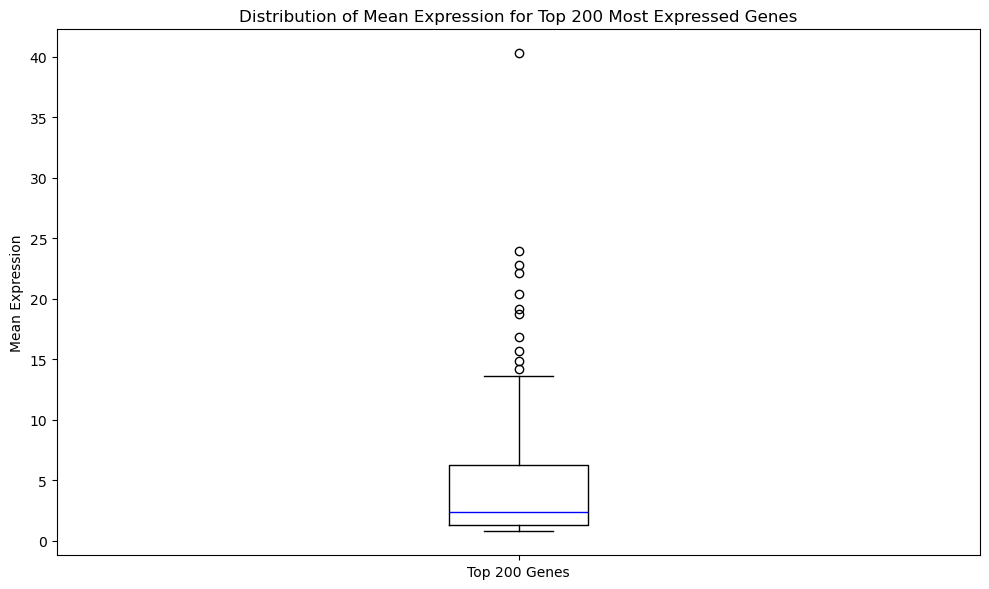

In [12]:
# filter out the zero genes
non_zero_genes_df = df.loc[:, (df != 0).any(axis=0)]

# calculate means for non-zero genes
non_zero_gene_means = non_zero_genes_df.mean()

# sort genes by mean expression and select top 200
top_200_genes = non_zero_gene_means.nlargest(200)

# create a boxplot of the means
plt.figure(figsize=(10, 6))
plt.boxplot(top_200_genes.values, medianprops=dict(color="blue"))
plt.title("Distribution of Mean Expression for Top 200 Most Expressed Genes")
plt.ylabel("Mean Expression")
plt.xticks([1], ["Top 200 Genes"])

plt.tight_layout()
plt.show()

In [13]:
# calculate the median, the IQR and the range of the expression values
median = np.median(top_200_genes.values)
Q1 = np.percentile(top_200_genes.values, 25)
Q3 = np.percentile(top_200_genes.values, 75)
IQR = Q3 - Q1
gene_range = np.max(top_200_genes.values) - np.min(top_200_genes.values)

print("IQR:", IQR)
print("Q3:", Q3)
print("median:", median)
print("Q1:", Q1)
print("Range of gene values:", gene_range)


IQR: 4.947400078741305
Q3: 6.220289738841336
median: 2.3891424488546056
Q1: 1.2728896601000306
Range of gene values: 39.52715845958675


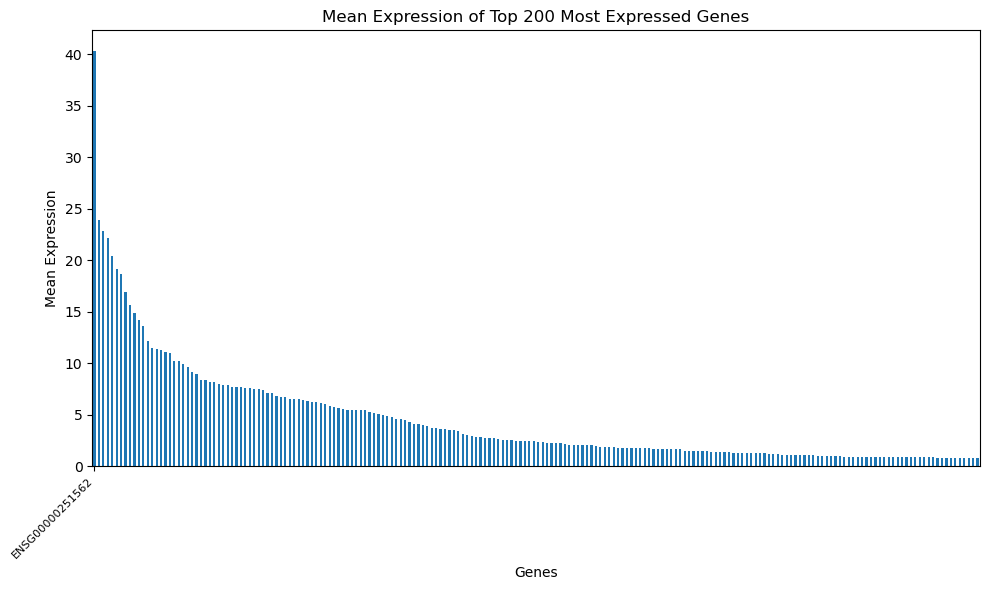

In [14]:
# plot the means of the top 200 most expressed genes
plt.figure(figsize=(10, 6))
top_200_genes.plot(kind="bar")
plt.title("Mean Expression of Top 200 Most Expressed Genes")
plt.xlabel("Genes")
plt.ylabel("Mean Expression")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.xticks([0], [top_200_genes.index[0]], fontsize=8)

plt.tight_layout()
plt.show()

In [15]:
# get the name of the gene with the highest mean expression
gene_with_highest_expression = top_200_genes.idxmax()

print("Gene with highest mean expression:", gene_with_highest_expression)


Gene with highest mean expression: ENSG00000251562
